In [1]:
import torch

In [2]:
# 检查是否支持 MPS
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    print("MPS 设备可用，PyTorch 将使用 GPU。")
    x = torch.ones(1, device=mps_device)
    print(f"在 MPS 设备上创建了一个 Tensor: {x}")
else:
    print("MPS 设备不可用，PyTorch 将使用 CPU。")

MPS 设备可用，PyTorch 将使用 GPU。
在 MPS 设备上创建了一个 Tensor: tensor([1.], device='mps:0')


In [3]:
dtype = torch.float
device = mps_device

a = torch.randn(2, 3, device=device, dtype=dtype)
b = torch.randn(2, 3, device=device, dtype=dtype)
a, b

(tensor([[ 0.1646,  0.1572, -1.6094],
         [ 0.6139, -0.8295,  0.2639]], device='mps:0'),
 tensor([[ 0.3428,  1.1078, -1.5746],
         [-1.1801, -2.3497,  0.9311]], device='mps:0'))

In [4]:
x = torch.ones(5, device=device, dtype=dtype)
y = torch.ones(10, dtype=torch.int64)
x, y

(tensor([1., 1., 1., 1., 1.], device='mps:0'),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [5]:
x.shape, y.shape

(torch.Size([5]), torch.Size([10]))

In [6]:
y = y.reshape((5, 2))

In [7]:
y, y.shape

(tensor([[1, 1],
         [1, 1],
         [1, 1],
         [1, 1],
         [1, 1]]),
 torch.Size([5, 2]))

In [8]:
x = x.reshape(1, 5)
x, x.shape

(tensor([[1., 1., 1., 1., 1.]], device='mps:0'), torch.Size([1, 5]))

In [9]:
z1 = torch.ones(8, device=device, dtype=torch.float)
z2 = torch.ones(8, device=device, dtype=torch.float)

z1.shape, z2.shape

(torch.Size([8]), torch.Size([8]))

In [10]:
res = z1.dot(z2)
res.shape, res

(torch.Size([]), tensor(8., device='mps:0'))

In [11]:
torch.get_device(x), torch.get_device(y), torch.get_device(z1)

(0, -1, 0)

In [12]:
torch.backends.mps.is_available()

True

In [13]:
m = torch.ones(10, device=device, dtype=torch.int64)
n = torch.ones(10, device=device, dtype=torch.int64)

m.to(torch.float).dot(n.to(torch.float))

tensor(10., device='mps:0')

In [14]:
# 假设你的 int64 张量是这样创建的
x_int64 = torch.tensor([1, 2, 3], dtype=torch.int64)
y_int64 = torch.tensor([4, 5, 6], dtype=torch.int64)

# 准备 MPS 设备
mps_device = torch.device("mps")

# 将张量移动到 MPS 设备并转换为浮点型
x_float32 = x_int64.to(mps_device).float()  # 或者 .to(torch.float32)
y_float32 = y_int64.to(mps_device).float()

# 现在执行点积操作
dot_product = torch.dot(x_float32, y_float32)

print(f"原始 int64 张量: {x_int64.dtype}")
print(f"转换后的浮点张量: {x_float32.dtype}")
print(f"点积结果: {dot_product}")

原始 int64 张量: torch.int64
转换后的浮点张量: torch.float32
点积结果: 32.0


In [15]:
a = torch.tensor([1, 2], dtype=torch.int32, device=mps_device)
b = torch.tensor([3, 4], dtype=torch.int32, device=mps_device)

# 某些复杂的数学运算可能需要浮点数输入
# 这里的点积操作在某些 PyTorch 版本或特定环境下可能会失败
dot_product = torch.dot(a, b)
(a, b, dot_product, dot_product.shape)

(tensor([1, 2], device='mps:0', dtype=torch.int32),
 tensor([3, 4], device='mps:0', dtype=torch.int32),
 tensor(11, device='mps:0', dtype=torch.int32),
 torch.Size([]))

In [16]:
import numpy as np
a = np.random.randn(2, 3)
a

array([[-1.15751126,  0.33693093, -0.71086177],
       [ 0.07633506,  0.16416533,  0.66767822]])

In [17]:
b = torch.from_numpy(a)
b, b.shape

(tensor([[-1.1575,  0.3369, -0.7109],
         [ 0.0763,  0.1642,  0.6677]], dtype=torch.float64),
 torch.Size([2, 3]))

In [18]:
# 张量相加
e = torch.randn(2, 3)
f = torch.randn(2, 3)

In [19]:
e + f

tensor([[-1.3673, -0.2279,  0.4502],
        [ 0.4546, -0.2069, -0.9870]])

In [20]:
e * f

NameError: name 'e' is not defined

In [165]:
e @ f.t()

tensor([[-0.8025,  2.8097],
        [-0.1521,  0.9669]])

In [166]:
f, f.transpose(1, 0), f.transpose(0, 1), f.T

(tensor([[-0.3922,  1.0138,  0.2164],
         [-0.1539,  0.3358, -2.2552]]),
 tensor([[-0.3922, -0.1539],
         [ 1.0138,  0.3358],
         [ 0.2164, -2.2552]]),
 tensor([[-0.3922, -0.1539],
         [ 1.0138,  0.3358],
         [ 0.2164, -2.2552]]),
 tensor([[-0.3922, -0.1539],
         [ 1.0138,  0.3358],
         [ 0.2164, -2.2552]]))

In [167]:
f.shape

torch.Size([2, 3])

In [21]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = (x**2).sum()
y.backward()
x.grad

tensor([2., 4., 6.])

In [22]:
# 创建一个需要梯度的张量
tensor_requires_grad = torch.tensor([1.0], requires_grad=True)

# 进行一些操作
tensor_result = tensor_requires_grad * 2

# 计算梯度
tensor_result.backward()
print(tensor_requires_grad.grad)  # 输出梯度

tensor([2.])


In [23]:
# 创建一个需要计算梯度的张量
x = torch.tensor([2.0, 3.0], requires_grad=True)
# 执行某些操作
y = x + 2
y.retain_grad()
z = y * y * 3
z.retain_grad()
out = z.mean()
out.retain_grad()

print(x)
print(y)
print(z)
print(out)

out.backward()
print("---------------")
print(x.grad)
print(y.grad)
print(z.grad)
print(out.grad)

tensor([2., 3.], requires_grad=True)
tensor([4., 5.], grad_fn=<AddBackward0>)
tensor([48., 75.], grad_fn=<MulBackward0>)
tensor(61.5000, grad_fn=<MeanBackward0>)
---------------
tensor([12., 15.])
tensor([12., 15.])
tensor([0.5000, 0.5000])
tensor(1.)


In [24]:
with torch.no_grad():
    m = x**3
print(m)

tensor([ 8., 27.])


In [41]:
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()
print(model)
for name, param in model.named_parameters():
    print(name, param.shape, param.requires_grad)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)
fc1.weight torch.Size([2, 2]) True
fc1.bias torch.Size([2]) True
fc2.weight torch.Size([1, 2]) True
fc2.bias torch.Size([1]) True


In [26]:
x = torch.randn(1, 2)
res = model.forward(x)
print(res)

tensor([[0.3445]], grad_fn=<AddmmBackward0>)


In [27]:
criterion = nn.MSELoss()
target = torch.randn(1, 1)
print(target)

tensor([[1.0708]])


In [28]:
loss = criterion(res, target)
print(loss)

tensor(0.5275, grad_fn=<MseLossBackward0>)


In [29]:
pow(-1.8981 - (-0.1836), 2)

2.9395102499999997

In [42]:
model2 = SimpleNN()
x = torch.randn(1, 2)
res = model2.forward(x)
print(f"res:{res}")

criterion = nn.MSELoss()
target = torch.randn(1, 1)
loss = criterion(res, target)
print(f"loss={loss}")

# 定义优化器（使用 Adam 优化器）
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# 训练步骤
optimizer.zero_grad()  # 清空梯度
loss.backward()  # 反向传播
optimizer.step()  # 更新参数
print(loss)

for name, param in model2.named_parameters():
    print(name, param.shape, param.requires_grad)

res:tensor([[0.2142]], grad_fn=<AddmmBackward0>)
loss=0.3704860508441925
tensor(0.3705, grad_fn=<MseLossBackward0>)
fc1.weight torch.Size([2, 2]) True
fc1.bias torch.Size([2]) True
fc2.weight torch.Size([1, 2]) True
fc2.bias torch.Size([1]) True


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

# ====== 1. 定义一个简单模型 ======
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(2, 1)  # weight (1x2) + bias (1)

    def forward(self, x):
        return self.fc(x)

model = MyModel()

# ====== 2. 打印初始参数 ======
print("=== 初始参数 ===")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# ====== 3. 构造数据和损失函数 ======
x = torch.tensor([[1.0, 2.0]])  # shape [1, 2]
y = torch.tensor([[5.0]])       # target

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# ====== 4. 前向传播 ======
y_pred = model(x)
loss = criterion(y_pred, y)
print(f"\nloss: {loss.item():.4f}")

# ====== 5. 反向传播，查看梯度 ======
loss.backward()

print("\n=== backward 后梯度 ===")
for name, param in model.named_parameters():
    print(f"{name}.grad: {param.grad}")

# ====== 6. 参数更新 ======
optimizer.step()

print("\n=== optimizer.step() 后参数 ===")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}, {id(param.data)}")

# ====== 7. 清空梯度 ======
optimizer.zero_grad()

print("\n=== zero_grad() 后梯度 ===")
for name, param in model.named_parameters():
    print(f"{name}.grad: {param.grad}")


=== 初始参数 ===
fc.weight: tensor([[-0.6484, -0.6297]])
fc.bias: tensor([-0.2482])

loss: 51.2081

=== backward 后梯度 ===
fc.weight.grad: tensor([[-14.3120, -28.6239]])
fc.bias.grad: tensor([-14.3120])

=== optimizer.step() 后参数 ===
fc.weight: tensor([[0.7828, 2.2327]]), 6375220192
fc.bias: tensor([1.1830]), 6375220192

=== zero_grad() 后梯度 ===
fc.weight.grad: None
fc.bias.grad: None


## 用Tensor写一个模型训练的全流程demo

Epoch [10/100], Loss: 1.0685
Epoch [20/100], Loss: 1.0399
Epoch [30/100], Loss: 1.0232
Epoch [40/100], Loss: 1.0120
Epoch [50/100], Loss: 1.0037
Epoch [60/100], Loss: 0.9968
Epoch [70/100], Loss: 0.9909
Epoch [80/100], Loss: 0.9860
Epoch [90/100], Loss: 0.9817
Epoch [100/100], Loss: 0.9778
Epoch [110/100], Loss: 0.9743
Epoch [120/100], Loss: 0.9714
Epoch [130/100], Loss: 0.9687
Epoch [140/100], Loss: 0.9662
Epoch [150/100], Loss: 0.9639
Epoch [160/100], Loss: 0.9618
Epoch [170/100], Loss: 0.9598
Epoch [180/100], Loss: 0.9579
Epoch [190/100], Loss: 0.9562
Epoch [200/100], Loss: 0.9544


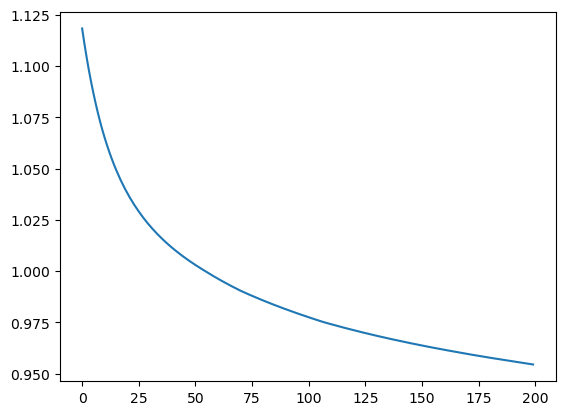

In [55]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        a = torch.relu(self.fc1(x))
        a = self.fc2(a)
        return a

myModel = MyModel()
data = torch.randn(100, 4)
labels = torch.randn(100, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(myModel.parameters(), lr=0.01)

cost_history = []

# 迭代
for epoch in range(200):
    optimizer.zero_grad() # 清空梯度
    pred = myModel.forward(data) # 前向计算
    loss = criterion(pred, labels) # 计算损失
    loss.backward() # 计算梯度
    optimizer.step() # 更新参数
    cost_history.append(loss.item())
    # 每 10 轮输出一次损失
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.show()

Epoch [10/100], Loss: 0.9528
Epoch [20/100], Loss: 0.9513
Epoch [30/100], Loss: 0.9499
Epoch [40/100], Loss: 0.9486
Epoch [50/100], Loss: 0.9474
Epoch [60/100], Loss: 0.9462
Epoch [70/100], Loss: 0.9451
Epoch [80/100], Loss: 0.9442
Epoch [90/100], Loss: 0.9434
Epoch [100/100], Loss: 0.9427
Epoch [110/100], Loss: 0.9420
Epoch [120/100], Loss: 0.9413
Epoch [130/100], Loss: 0.9406
Epoch [140/100], Loss: 0.9399
Epoch [150/100], Loss: 0.9393
Epoch [160/100], Loss: 0.9387
Epoch [170/100], Loss: 0.9382
Epoch [180/100], Loss: 0.9375
Epoch [190/100], Loss: 0.9370
Epoch [200/100], Loss: 0.9364


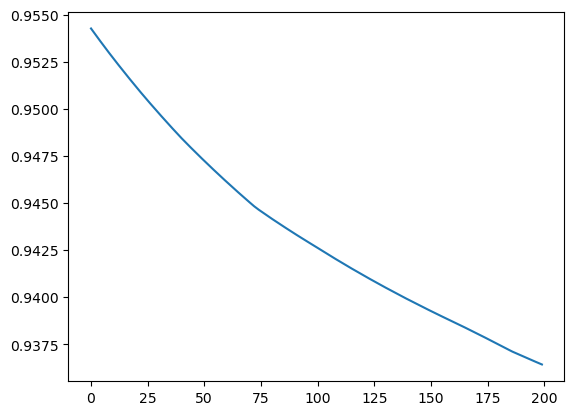

In [57]:
## 转到mps 设备
device = torch.device("mps")
myModel.to(device)
data = data.to(device)
labels = labels.to(device)

cost_history = []

# 迭代
for epoch in range(200):
    optimizer.zero_grad() # 清空梯度
    pred = myModel.forward(data) # 前向计算
    loss = criterion(pred, labels) # 计算损失
    loss.backward() # 计算梯度
    optimizer.step() # 更新参数
    cost_history.append(loss.item())
    # 每 10 轮输出一次损失
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.show()

In [58]:
tensor_2d = torch.tensor([
    [-9, 4, 2, 5, 7],
    [3, 0, 12, 8, 6],
    [1, 23, -6, 45, 2],
    [22, 3, -1, 72, 6]
])
print("2D Tensor (Matrix):\n", tensor_2d)
print("Shape:", tensor_2d.shape)  # 形状

2D Tensor (Matrix):
 tensor([[-9,  4,  2,  5,  7],
        [ 3,  0, 12,  8,  6],
        [ 1, 23, -6, 45,  2],
        [22,  3, -1, 72,  6]])
Shape: torch.Size([4, 5])


In [59]:
tensor_3d = torch.stack([tensor_2d, tensor_2d + 5, tensor_2d - 5])
print("3D Tensor (Matrix):\n", tensor_3d)

3D Tensor (Matrix):
 tensor([[[ -9,   4,   2,   5,   7],
         [  3,   0,  12,   8,   6],
         [  1,  23,  -6,  45,   2],
         [ 22,   3,  -1,  72,   6]],

        [[ -4,   9,   7,  10,  12],
         [  8,   5,  17,  13,  11],
         [  6,  28,  -1,  50,   7],
         [ 27,   8,   4,  77,  11]],

        [[-14,  -1,  -3,   0,   2],
         [ -2,  -5,   7,   3,   1],
         [ -4,  18, -11,  40,  -3],
         [ 17,  -2,  -6,  67,   1]]])


In [66]:
tensor_1d = torch.randn(4)
tensor_1d_2 = torch.randn(4)
tensor_2d = torch.stack((tensor_1d, tensor_1d_2))
res = torch.vstack([tensor_1d, tensor_1d_2])
print(res)
res = torch.hstack([tensor_1d, tensor_1d_2])
print(res)

tensor([[ 1.5474, -0.1144, -1.1532,  0.3698],
        [-0.0048,  0.6532, -0.9203, -0.4707]])
tensor([ 1.5474, -0.1144, -1.1532,  0.3698, -0.0048,  0.6532, -0.9203, -0.4707])


In [68]:
tensor_1d.shape, tensor_2d.size()

(torch.Size([4]), torch.Size([2, 4]))

In [69]:
tensor_2d.dim(), tensor_3d.dim()

(2, 3)

In [71]:
print(tensor_2d)
tensor_2d.numel()

tensor([[ 1.5474, -0.1144, -1.1532,  0.3698],
        [-0.0048,  0.6532, -0.9203, -0.4707]])


8

In [76]:
print(tensor_2d.T)
print(tensor_2d.t())
print(tensor_2d.transpose(0, 1))

tensor([[ 1.5474, -0.0048],
        [-0.1144,  0.6532],
        [-1.1532, -0.9203],
        [ 0.3698, -0.4707]])
tensor([[ 1.5474, -0.0048],
        [-0.1144,  0.6532],
        [-1.1532, -0.9203],
        [ 0.3698, -0.4707]])
tensor([[ 1.5474, -0.0048],
        [-0.1144,  0.6532],
        [-1.1532, -0.9203],
        [ 0.3698, -0.4707]])


In [78]:
tensor_2d.itemsize

4

In [86]:
print(tensor_2d[0, 2])
print(tensor_2d[0, 2].item())
print(tensor_2d[0, 2].itemsize)
print(tensor_2d.tolist())
print(tensor_2d.shape)
print(tensor_2d.numpy())


tensor(-1.1532)
-1.1531753540039062
4
[[1.547359585762024, -0.1144319474697113, -1.1531753540039062, 0.36980316042900085], [-0.004835020750761032, 0.6531780958175659, -0.9203383922576904, -0.47068822383880615]]
torch.Size([2, 4])
[[ 1.5473596  -0.11443195 -1.1531754   0.36980316]
 [-0.00483502  0.6531781  -0.9203384  -0.47068822]]
